In [1]:
# Core scverse libraries
import scanpy as sc
import random
random.seed(123)

sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

In [2]:
adata = sc.read(filename="pbmc_normed.h5ad")
adata.X = adata.layers["counts"].copy()
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

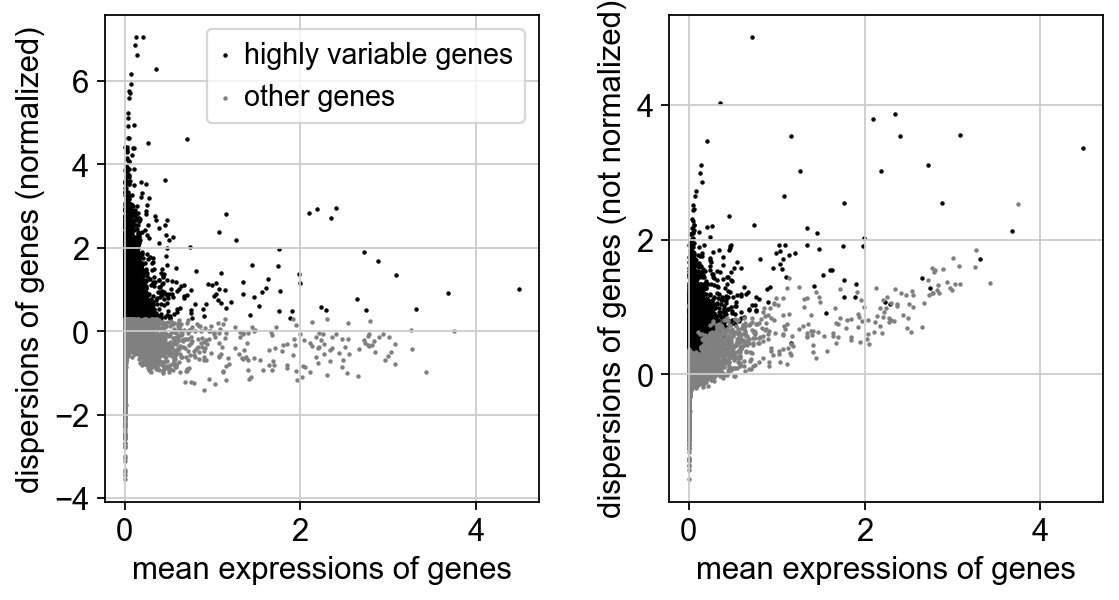

In [3]:
## 500-5000 HVGs
## scanpy.pp.highly_variable_genes(adata, *, layer=None(X), n_top_genes=None, 
# min_disp=0.5, max_disp=inf, min_mean=0.0125, max_mean=3,
# span=0.3, # The fraction of the data (cells) used when estimating the variance in the loess model
# n_bins=20, # Number of bins for binning the mean gene expression. 
# flavor='seurat', 
# subset=False, # Inplace subset to highly-variable genes if True otherwise merely indicate highly variable genes.
# inplace=True, # Whether to place calculated metrics in .var or return them.
# batch_key=None, # If specified, highly-variable genes are selected within each batch separately and merged. This simple process avoids the selection of batch-specific genes and acts as a lightweight batch correction method.
# check_values=True) # Check if counts in selected layer are integers. 
sc.pp.highly_variable_genes(adata, n_top_genes=4000, batch_key="batch")
sc.pl.highly_variable_genes(adata)

In [4]:
adata


AnnData object with n_obs × n_vars = 3666 × 48678
    obs: 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'scDblFinder_score', 'scDblFinder_class'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg'
    layers: 'counts', 'log1p_norm', 'soupX_counts'

In [5]:
## adata.X = adata.layers["log1p_norm"]
# setting highly variable as highly deviant to use scanpy 'use_highly_variable' argument in sc.pp.pca
sc.pp.scale(adata)
sc.pp.pca(adata, svd_solver="arpack", use_highly_variable=True)

/Users/secretloong/.pyenv/versions/anaconda3-2024.10-1/envs/singlecell/lib/python3.10/site-packages/scanpy/preprocessing/_pca/__init__.py:438: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


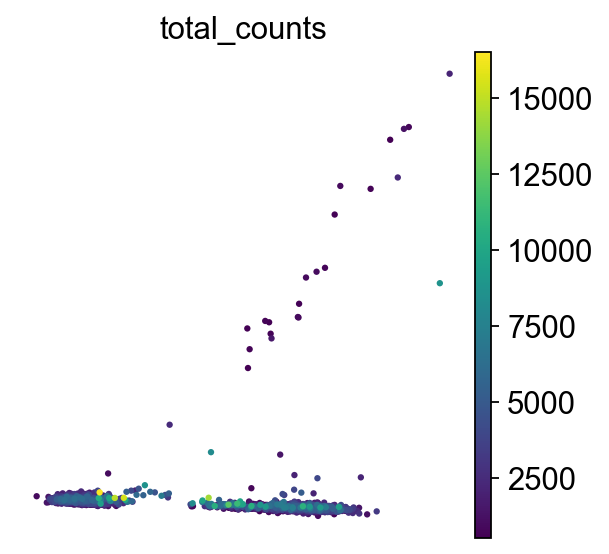

In [6]:
sc.pl.pca_scatter(adata, color="total_counts")

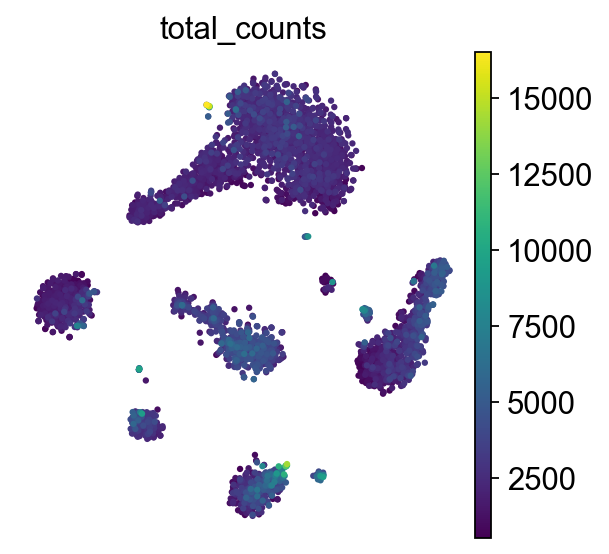

In [7]:
sc.tl.tsne(adata, use_rep="X_pca")
sc.pl.tsne(adata, color="total_counts")

/Users/secretloong/.pyenv/versions/anaconda3-2024.10-1/envs/singlecell/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


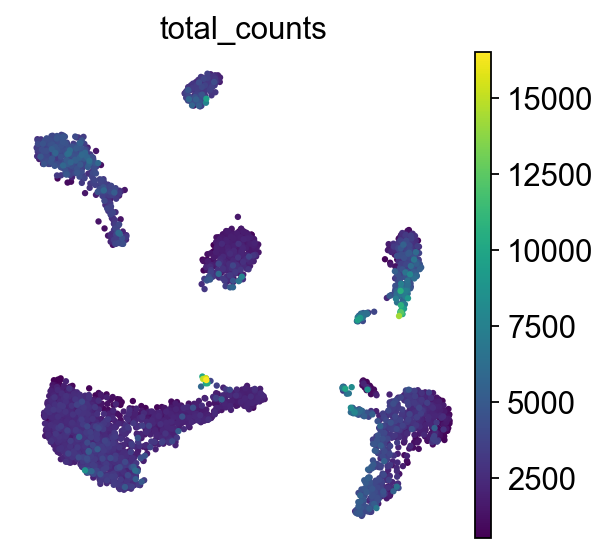

In [8]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color="total_counts")

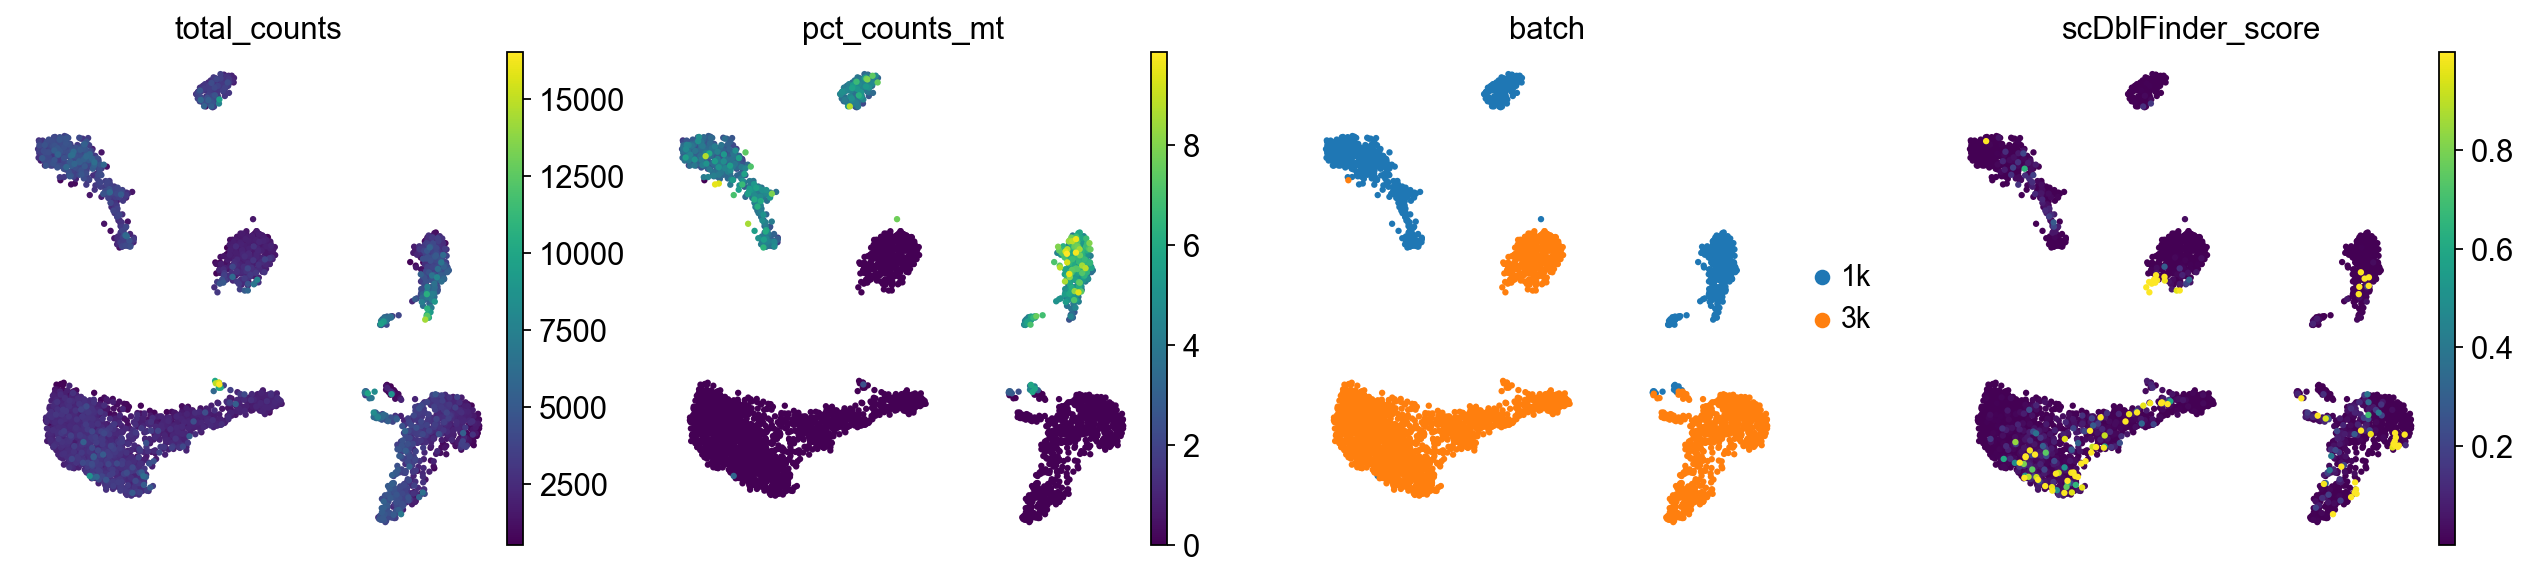

In [9]:
sc.pl.umap(
    adata,
    color=["total_counts", "pct_counts_mt", "batch", "scDblFinder_score"],
)

In [10]:
adata.write_h5ad("pbmc_pca.h5ad",compression='gzip')